In [ ]:
from genesis_interface import parsers
from genesis_interface import genesis
import numpy as np
import matplotlib.pyplot as plt
from genesis_interface import analysis
from sdds2genesis import match_to_FODO,sdds2genesis
import SDDS
import sys, os, csv, copy,shutil

## **Read elegant output file**

In [19]:
currentdic = os.getcwd()
targetdic = currentdic+'/../XAMP_0.22'
filename = targetdic+'/HXRSTART.out'
mc2_eV = 0.511e6
fnhead = '.'.join(filename.split('.')[:-1])
cwd = os.path.realpath(os.path.curdir)
    
# load data
ff = SDDS.readSDDS(filename)
parameters, bunches = ff.read()
print('number of bunches: ', bunches.shape[0],' \t particles in bunch 0: ', bunches.shape[1])
d = bunches[0].T # particle data
npart = bunches.shape[1] # number of macroparticles
charge_pC = parameters[0]['Charge'] * 1e12

    
# center in time
d[4,:] -= np.mean(d[4,:])
d[5,:] += 0.01e9/mc2_eV

number of bunches:  1  	 particles in bunch 0:  1000001


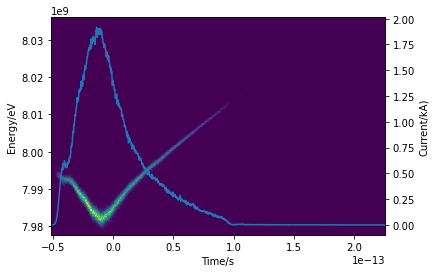

In [20]:
tmean = d[4].mean()
twind = d[4].max() - d[4].min()
Emean = d[5].mean() * mc2_eV
    

plt.figure()
ax = plt.gca()
ax_I = ax.twinx()
h, xedges, yedges, image = ax.hist2d(d[4,:],d[5,:] * mc2_eV,bins=1000); 
ax.set_xlabel('Time/s'); ax.set_ylabel('Energy/eV'); 
     # current profile 
xcoords = 0.5*(xedges[1:]+xedges[:-1])
ycoords = np.sum(h,axis=1) / np.sum(h) * charge_pC / np.mean(np.diff(xcoords))*1e-12/1e3
    
ax_I.plot(xcoords, ycoords, label='All');
   
ax_I.set_ylabel('Current/kA)'); 
#ax.set_xlim([-0.5e-13,0])
plt.show()
plt.close()

# Cut the beam

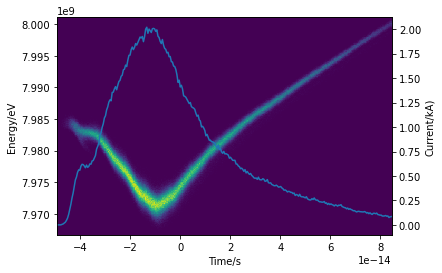

In [10]:
#cut_range =  [-0.3e-13,0.2e-13]

t_min  = -0.5e-13
zsep =40
xlamds = 1.261043e-10
nslice = 8000
tdur = nslice*xlamds/3e8*zsep
t_max =  t_min + tdur
        
d_cut = d[:,(d[4,:]>=t_min)&(d[4,:]<=t_max)]
#d_cut[4,:] -= np.mean(d_cut[4,:])
        
charge_core_frac = charge_pC*d_cut.shape[1]/d.shape[1]

plt.figure()
ax = plt.gca()
ax_I = ax.twinx()
h, xedges, yedges, image = ax.hist2d(d_cut[4,:],d_cut[5,:] * mc2_eV,bins=300); 
ax.set_xlabel('Time/s'); ax.set_ylabel('Energy/eV'); 
     # current profile 
xcoords = 0.5*(xedges[1:]+xedges[:-1])
ycoords = np.sum(h,axis=1) / np.sum(h) * charge_core_frac / np.mean(np.diff(xcoords))*1e-12/1e3
    
ax_I.plot(xcoords, ycoords, label='All');
   
ax_I.set_ylabel('Current/kA)'); 
plt.show()
plt.close()

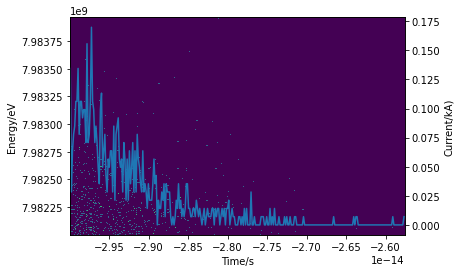

In [8]:
#cut_range =  [-0.3e-13,0.2e-13]

t_min  = -0.3e-13
zsep =40
xlamds = 1.261043e-10
nslice =int(5350/3)
tdur = nslice*xlamds/3e8*zsep
t_max =  t_min + tdur
Emin = 7.982e9/mc2_eV
Emax = 7.987e9/mc2_eV

d_cut = d[:,(d[4,:]>=t_min)&(d[4,:]<=t_max)]
d_cut = d_cut[:,(d_cut[5,:]>=Emin)&(d_cut[5,:]<=Emax)]

#d_cut[4,:] -= np.mean(d_cut[4,:])
        
charge_core_frac = charge_pC*d_cut.shape[1]/d.shape[1]

plt.figure()
ax = plt.gca()
ax_I = ax.twinx()
h, xedges, yedges, image = ax.hist2d(d_cut[4,:],d_cut[5,:] * mc2_eV,bins=300); 
ax.set_xlabel('Time/s'); ax.set_ylabel('Energy/eV'); 
     # current profile 
xcoords = 0.5*(xedges[1:]+xedges[:-1])
ycoords = np.sum(h,axis=1) / np.sum(h) * charge_core_frac / np.mean(np.diff(xcoords))*1e-12/1e3
    
ax_I.plot(xcoords, ycoords, label='All');
   
ax_I.set_ylabel('Current/kA)'); 
plt.show()
plt.close()

In [22]:
np.std(d_cut[5,:])*mc2_eV/1e6

1.0148675050417337

In [6]:
#ind_mid = np.argmax(ycoords)
#tmin = xcoords[ind_mid-10]
#tmax = xcoords[ind_mid + 10]
tmin = -0.5e-14
tmax = 0.5e-14
t = d_cut[4,:]
ind = (t>tmin)&(t<tmax)
sig_t = np.std(d_cut[4,ind])
sig_gamma = np.std(d_cut[5,ind])
espread = sig_gamma*0.511

mean_gamma = np.mean(d_cut[5,ind])
sig_x = np.std(d_cut[0,ind])
print("sig_t = "+str(sig_t))
print("sig_gamma = "+str(sig_gamma))
print("sig_x = "+str(sig_x))
print("mean_gamma = "+str(mean_gamma))
print("core energy spread = " + str(sig_gamma/mean_gamma*100)+'%')

x2 = np.mean(d_cut[0,ind]**2)
xp2 = np.std(d_cut[1,ind]**2)
xxp2 = np.mean(d_cut[0,ind]*d_cut[1,ind])**2

emit_n = mean_gamma*np.sqrt(x2*xp2-xxp2)
print("emit_n = "+str(emit_n))

charge_core_frac = charge_pC*d_cut.shape[1]/d.shape[1]
print("charge= "+ str(charge_core_frac))

sig_t = 2.8714823478986815e-15
sig_gamma = 6.32314151394269
sig_x = 1.8273411152256914e-05
mean_gamma = 15622.121996748308
core energy spread = 0.040475560972183106%
emit_n = 5.813050740076334e-07
charge= 94.10426


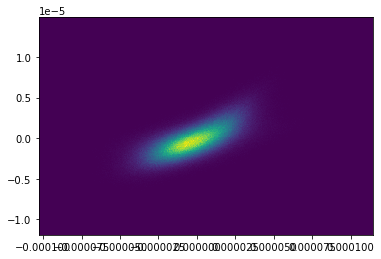

In [7]:
h, xedges, yedges, image = plt.hist2d(d_cut[0,:],d_cut[1,:],bins=500); 
plt.show()

## **Match the core part of the beam**

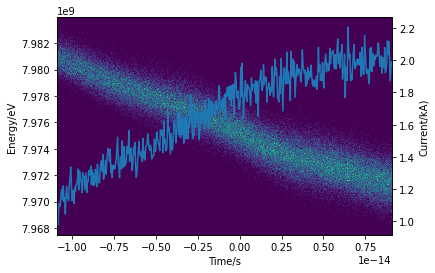

In [21]:
core_range =  [-3e-14,-1e-14]

t_min  = core_range[0]
t_max =  core_range[1]
        
d_core = d_cut[:,(d_cut[4,:]>=t_min)&(d_cut[4,:]<=t_max)]
d_core[4,:] -= np.mean(d_core[4,:])
        
charge_core_frac = charge_pC*d_core.shape[1]/d.shape[1]

plt.figure()
ax = plt.gca()
ax_I = ax.twinx()
h, xedges, yedges, image = ax.hist2d(d_core[4,:],d_core[5,:] * mc2_eV,bins=500); 
ax.set_xlabel('Time/s'); ax.set_ylabel('Energy/eV'); 
     # current profile 
xcoords = 0.5*(xedges[1:]+xedges[:-1])
ycoords = np.sum(h,axis=1) / np.sum(h) * charge_core_frac / np.mean(np.diff(xcoords))*1e-12/1e3
    
ax_I.plot(xcoords, ycoords, label='All');
   
ax_I.set_ylabel('Current/kA)'); 
plt.show()
plt.close()

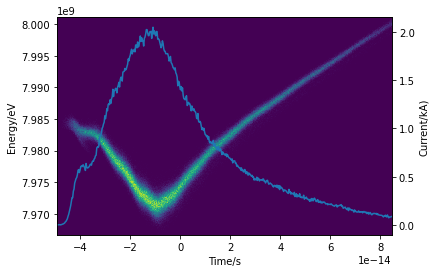

In [22]:
#match the spike
d_match, average_beamsize_core, emittance_normalized_core= match_to_FODO(d_cut, d_core, L_quad=10*0.026, L_drift=150*0.026, g_quad=14.584615)

#match the whole beam
#d_match, average_beamsize_core, emittance_normalized_core= match_to_FODO(d_cut, d_cut, L_quad=10*0.026, L_drift=150*0.026, g_quad=14.584615)
charge_core_frac = charge_pC*d_match.shape[1]/d.shape[1]

plt.figure()
ax = plt.gca()
ax_I = ax.twinx()
h, xedges, yedges, image = ax.hist2d(d_match[4,:],d_match[5,:] * mc2_eV,bins=500); 
ax.set_xlabel('Time/s'); ax.set_ylabel('Energy/eV'); 
     # current profile 
xcoords = 0.5*(xedges[1:]+xedges[:-1])
ycoords = np.sum(h,axis=1) / np.sum(h) * charge_core_frac / np.mean(np.diff(xcoords))*1e-12/1e3
    
ax_I.plot(xcoords, ycoords, label='All');
   
ax_I.set_ylabel('Current/kA)'); 
plt.show()
plt.close()

## **Dump the beam to dist file**

In [23]:
# dump distribution to distfile for genesis

genesis_ndmax = int(1e6)
# select particles randomly but in order
npart_match = np.shape(d_match)[1]
cut_ndmax = np.arange(npart_match); np.random.shuffle(cut_ndmax); cut_ndmax = cut_ndmax < genesis_ndmax
indicies_ndmax = np.arange(npart_match)[cut_ndmax]
beam_sel_charge = charge_pC * npart_match / npart *1e-12
#print(keep_charge_fraction, '=?', 1. * npart_match / npart)
    
header = ["# sdds2genesis from elegant matched for undulator line "]
header += ["? version = 1.0"]
header += ["? charge =   " + str(beam_sel_charge)]
header += ["? size =   " + str(genesis_ndmax)]
header += ["? COLUMNS X XPRIME Y YPRIME T GAMMA"]
    
distfilename = fnhead+'_matchproj.dist'
with open(distfilename, 'w') as distfile:
    for line in header:
        distfile.write(line+'\n')
            
    writer = csv.writer(distfile, delimiter=" ") # genesis requires space delimiters but can also do "\t "
    for i in indicies_ndmax:
        writer.writerow(d_match[:6,i])
    
print('INFO: Wrote ',distfilename)

INFO: Wrote  /sdf/group/beamphysics/jytang/genesis/CBXFEL/genesis_interface/../XAMP_0.22/HXRSTART_matchproj.dist


In [4]:
!bash run_genesis_nodist.sh  ./test_super/

cp: omitting directory ‘genesis’
cp: omitting directory ‘test_genesis’
cp: omitting directory ‘test_genesis2’
cp: omitting directory ‘test_new_genesis’
mv: cannot stat ‘HXRSTART_matchproj.dist’: No such file or directory
/nfs/slac/g/beamphysics/jytang/genesis/lasershaping2/cavity/test_super
gen_tap0.014_K1.4_s0_t1
../genesis_scan_taper.py:114: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  g.input['nslice'] = np.int(1.*g.input['nslice']/g.input['zsep'])
Job <255426> is submitted to queue <beamphys-centos7>.
gen_tap0.014_K1.42_s0_t1
Job <255428> is

In [2]:
!bash run_genesis_nodist.sh  ./test_super_comp/

Not a conda environment: /nfs/slac/g/beamphysics/jytang/genesis/lasershaping2/cavity/test_super_comp
Not a conda environment: /nfs/slac/g/beamphysics/jytang/genesis/lasershaping2/cavity/test_super_comp
cp: omitting directory `genesis'
cp: omitting directory `test_genesis'
cp: omitting directory `test_genesis2'
mv: cannot stat `HXRSTART_matchproj.dist': No such file or directory
/nfs/slac/g/beamphysics/jytang/genesis/lasershaping2/cavity/test_super_comp
gen_tap0.014_K1.169_s0_t
cd /nfs/slac/g/beamphysics/jytang/genesis/lasershaping2/cavity/test_super_comp
ssh: Could not resolve hostname oak: Name or service not known

Done submitting jobs.



In [5]:
!bash run_genesis_nodist.sh  ./flattop_as2/

cp: omitting directory `genesis'
cp: omitting directory `test_genesis2'
cp: omitting directory `test_new_genesis'
mv: cannot stat `HXRSTART_matchproj.dist': No such file or directory
/nfs/slac/g/beamphysics/jytang/genesis/lasershaping2/cavity/flattop_as2
gen_tap0.014_K1.169_s0_t

Done submitting jobs.



In [16]:
!bash run_genesis_nodist.sh  ./flattop_20fs/

cp: omitting directory `genesis'
cp: omitting directory `test_genesis'
cp: omitting directory `test_genesis2'
mv: cannot stat `HXRSTART_matchproj.dist': No such file or directory
/nfs/slac/g/beamphysics/jytang/genesis/lasershaping2/cavity/flattop_20fs
gen_tap0.0_K1.167_s0_t
cd /nfs/slac/g/beamphysics/jytang/genesis/lasershaping2/cavity/flattop_20fs

Done submitting jobs.

